In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('DATA/fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


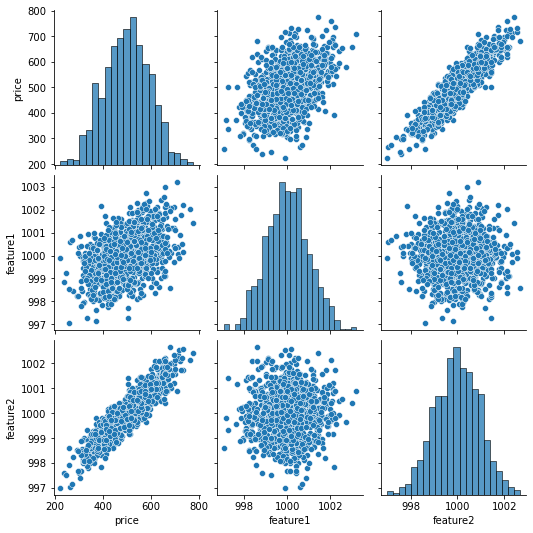

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1', 'feature2']].values

In [9]:
y = df['price'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [12]:
X_train.shape

(600, 2)

In [13]:
X_test.shape

(400, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# help(MinMaxScaler)

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

# Create Neural Network model

## Creating and Training the model


We set up the base sequential model, and we keep adding layers to it.

In this case, a dense layer.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
help(Sequential)
# help(Dense)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

There are 2 ways to creating a Keras-based model:

1. Call Sequential and pass in the layers.
2. Create an empty Sequential model and add each layers separately, one at a time.

In [24]:
model = Sequential([Dense(4, activation='relu'),
                   Dense(2, activation='relu'),
                   Dense(1)])
# 4 neurons densely connected (every neuron being connected to one another) with an activation function ReLU

In [25]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

In [27]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1)) # the final output layer

# the final step is to compile the model
# 2 of the most important parameters are optimizer and loss
model.compile(optimizer='rmsprop', loss='mse')

## Choosing an optimizer and loss
It always depends on the problem we're trying to solve:

 `# For multi-class classification:
 model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])`

 `# For binary classification:
 model.compile(optimizer='rmsprop',
       loss='binary_crossentropy',
       metrics=['accuracy'])`
        
 `# For mean squared error regression:
 model.compile(optimizer='rmsprop',
               loss='mse')`

In [36]:
model.fit(x=X_train, y=y_train, epochs=250)
# epoc is how many times the model will adjust and reevaluate

Epoch 1/250
19/19 [==============================] - 0s 443us/step - loss: 24.2364
Epoch 2/250
19/19 [==============================] - 0s 388us/step - loss: 24.1830
Epoch 3/250
19/19 [==============================] - 0s 416us/step - loss: 23.9908
Epoch 4/250
19/19 [==============================] - 0s 420us/step - loss: 24.3855
Epoch 5/250
19/19 [==============================] - 0s 388us/step - loss: 24.3246
Epoch 6/250
19/19 [==============================] - 0s 380us/step - loss: 24.0441
Epoch 7/250
19/19 [==============================] - 0s 407us/step - loss: 24.1755
Epoch 8/250
19/19 [==============================] - 0s 388us/step - loss: 23.8440
Epoch 9/250
19/19 [==============================] - 0s 388us/step - loss: 24.1085
Epoch 10/250
19/19 [==============================] - 0s 391us/step - loss: 24.3979
Epoch 11/250
19/19 [==============================] - 0s 365us/step - loss: 24.4210
Epoch 12/250
19/19 [==============================] - 0s 381us/step - loss: 24.3967
E

19/19 [==============================] - 0s 388us/step - loss: 23.9328
Epoch 99/250
19/19 [==============================] - 0s 426us/step - loss: 24.5305
Epoch 100/250
19/19 [==============================] - 0s 429us/step - loss: 23.9715
Epoch 101/250
19/19 [==============================] - 0s 430us/step - loss: 24.0256
Epoch 102/250
19/19 [==============================] - 0s 356us/step - loss: 24.4543
Epoch 103/250
19/19 [==============================] - 0s 400us/step - loss: 24.2027
Epoch 104/250
19/19 [==============================] - 0s 372us/step - loss: 24.1728
Epoch 105/250
19/19 [==============================] - 0s 382us/step - loss: 24.4679
Epoch 106/250
19/19 [==============================] - 0s 387us/step - loss: 24.1877
Epoch 107/250
19/19 [==============================] - 0s 388us/step - loss: 24.0820
Epoch 108/250
19/19 [==============================] - 0s 383us/step - loss: 24.5434
Epoch 109/250
19/19 [==============================] - 0s 375us/step - loss: 24.

19/19 [==============================] - 0s 388us/step - loss: 24.2179
Epoch 195/250
19/19 [==============================] - 0s 388us/step - loss: 24.4640
Epoch 196/250
19/19 [==============================] - 0s 381us/step - loss: 24.0277
Epoch 197/250
19/19 [==============================] - 0s 379us/step - loss: 24.3872
Epoch 198/250
19/19 [==============================] - 0s 386us/step - loss: 23.9730
Epoch 199/250
19/19 [==============================] - 0s 381us/step - loss: 24.1329
Epoch 200/250
19/19 [==============================] - 0s 372us/step - loss: 24.2227
Epoch 201/250
19/19 [==============================] - 0s 389us/step - loss: 24.2150
Epoch 202/250
19/19 [==============================] - 0s 379us/step - loss: 23.8548
Epoch 203/250
19/19 [==============================] - 0s 366us/step - loss: 24.0125
Epoch 204/250
19/19 [==============================] - 0s 443us/step - loss: 24.2186
Epoch 205/250
19/19 [==============================] - 0s 443us/step - loss: 24

How to have a look at the model's training history:

In [31]:
model.history.history
# a list of the model's historical losses 

{'loss': [257746.5625,
  257559.46875,
  257365.5,
  257146.453125,
  256894.53125,
  256606.875,
  256280.953125,
  255913.328125,
  255497.578125,
  255034.53125,
  254520.6875,
  253950.671875,
  253322.15625,
  252631.46875,
  251876.1875,
  251050.046875,
  250143.78125,
  249161.015625,
  248099.765625,
  246949.09375,
  245711.3125,
  244379.890625,
  242947.046875,
  241414.296875,
  239769.4375,
  238015.546875,
  236143.96875,
  234167.890625,
  232057.125,
  229824.21875,
  227462.265625,
  224962.046875,
  222338.15625,
  219570.5625,
  216659.71875,
  213602.5,
  210396.140625,
  207049.28125,
  203556.109375,
  199907.671875,
  196099.28125,
  192134.296875,
  188038.609375,
  183768.265625,
  179355.234375,
  174776.859375,
  170050.953125,
  165221.8125,
  160226.421875,
  155074.8125,
  149799.359375,
  144391.3125,
  138888.3125,
  133241.046875,
  127490.453125,
  121672.90625,
  115776.2109375,
  109763.4765625,
  103692.421875,
  97614.890625,
  91550.1640625,
  85

In [32]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

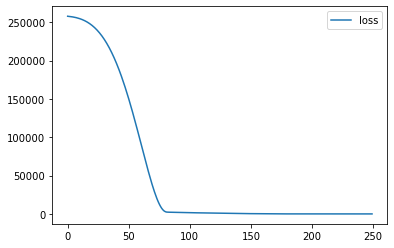

In [33]:
loss_df.plot()

## Evaluating the model

In [34]:
model.evaluate(X_test, y_test, verbose=0)

25.42754364013672

This means this model performs on the test set that it has never seen before with a mean squared error of 25.42.


And the loss on the training set:

In [35]:
model.evaluate(X_train, y_train, verbose=0)

23.688541412353516

In [37]:
test_predictions = model.predict(X_test)

In [38]:
test_predictions

array([[432.7565 ],
       [426.72073],
       [415.03592],
       [591.44556],
       [501.9929 ],
       [388.27304],
       [449.5762 ],
       [541.74585],
       [396.28598],
       [436.12546],
       [350.15125],
       [398.21555],
       [630.70667],
       [463.32675],
       [435.27335],
       [375.78165],
       [506.57632],
       [585.85046],
       [637.881  ],
       [567.1113 ],
       [598.6086 ],
       [404.2324 ],
       [482.4617 ],
       [471.19266],
       [559.2468 ],
       [560.83   ],
       [463.88635],
       [540.0278 ],
       [585.8154 ],
       [470.2731 ],
       [504.62244],
       [441.2351 ],
       [645.21924],
       [558.82477],
       [545.7821 ],
       [598.1628 ],
       [414.65295],
       [537.65375],
       [616.4451 ],
       [610.42804],
       [440.2236 ],
       [525.36487],
       [450.11172],
       [405.72977],
       [367.8936 ],
       [472.22122],
       [604.05237],
       [478.5944 ],
       [625.3063 ],
       [508.11563],


In [41]:
test_predictions = pd.Series(test_predictions.reshape(400,))
test_predictions

0      432.756500
1      426.720734
2      415.035919
3      591.445557
4      501.992889
          ...    
395    547.394104
396    587.781006
397    353.131989
398    533.859009
399    320.512848
Length: 400, dtype: float32

In [47]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [48]:
pred_df

,Test True Y
0,433.998384
1,424.611088
2,415.442985
3,587.307770
4,499.948310
...,...
395,546.024553
396,596.271617
397,357.116052
398,544.181310


In [49]:
 pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [51]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,433.998384,432.756500
1,424.611088,426.720734
2,415.442985,415.035919
3,587.307770,591.445557
4,499.948310,501.992889
...,...,...
395,546.024553,547.394104
396,596.271617,587.781006
397,357.116052,353.131989
398,544.181310,533.859009


The table above shows what was the actual price versus what the model predicted.

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

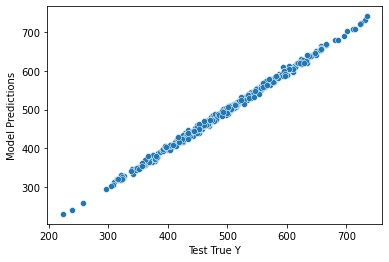

In [52]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.9605292057685246

This value means the model makes an average of $3.9 error in estimating the prices.

In [55]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


Given that the average price in the dataset is around $498, a mean absolute error of 3.9 can be considered as good performance (less than 1%).

In [56]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.899551919367124

Checking on new random data:

In [58]:
new_gemstone = [[998, 1000]]

Since the model was **trained on the scaled** training dataset, **first we need to scale the data** we want to feed to the model.

In [59]:
new_gemstone = scaler.transform(new_gemstone)

In [60]:
model.predict(new_gemstone)

array([[419.7457]], dtype=float32)

## Saving the model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save('my_gem_model.h5')

In [63]:
later_model = load_model('my_gem_model.h5')

In [64]:
later_model.predict(new_gemstone)

array([[419.7457]], dtype=float32)